<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10942 entries, 0 to 10941
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   itemId         10942 non-null  int64 
 1   category       10942 non-null  object
 2   name           10942 non-null  object
 3   brandName      10940 non-null  object
 4   url            10942 non-null  object
 5   price          10942 non-null  int64 
 6   averageRating  10942 non-null  int64 
 7   totalReviews   10942 non-null  int64 
 8   retrievedDate  10942 non-null  object
dtypes: int64(4), object(5)
memory usage: 769.5+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 10940 entries, 0 to 10941
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   itemId         10940 non-null  int64 
 1   category       10940 non-null  object
 2   name           10940 non-null  object
 3   brandName      10940 non-null  object
 

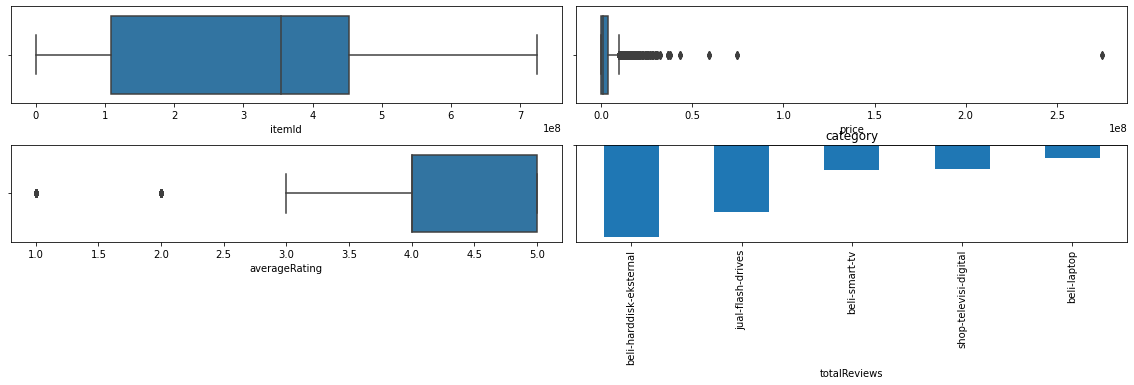

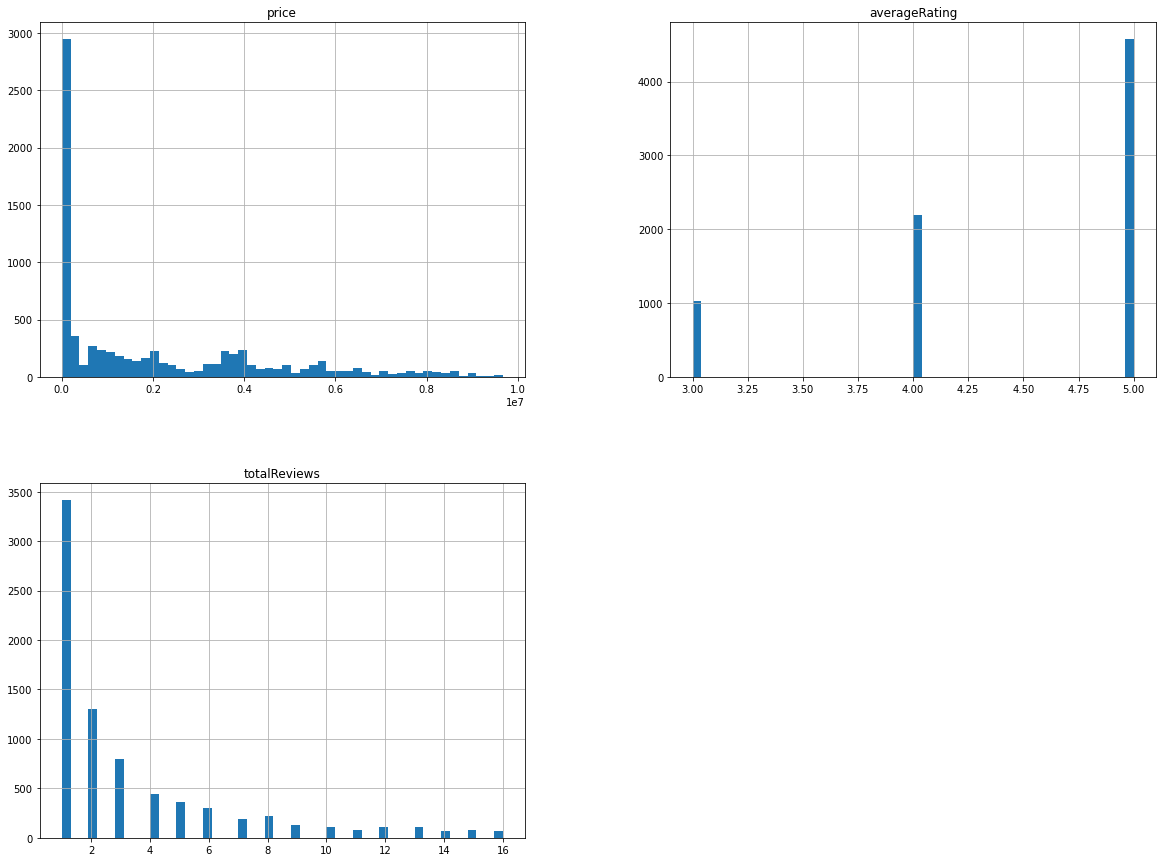

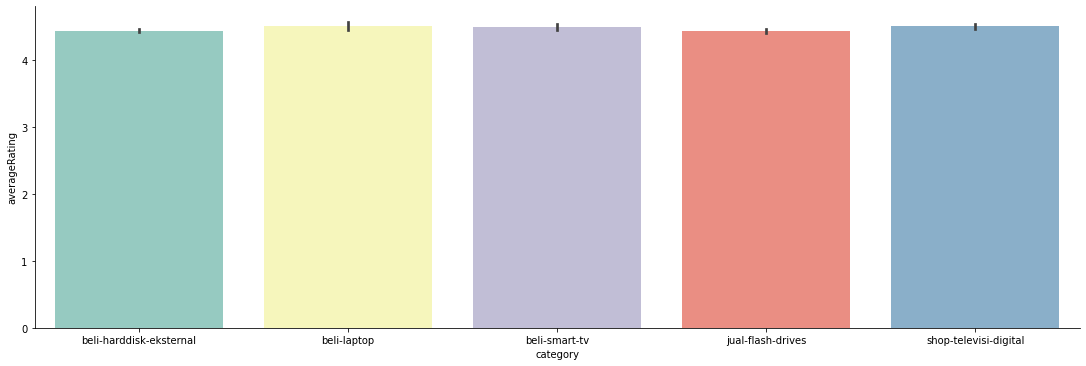

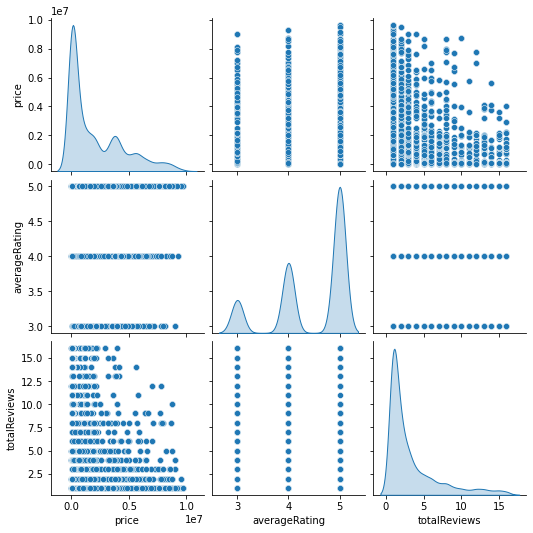

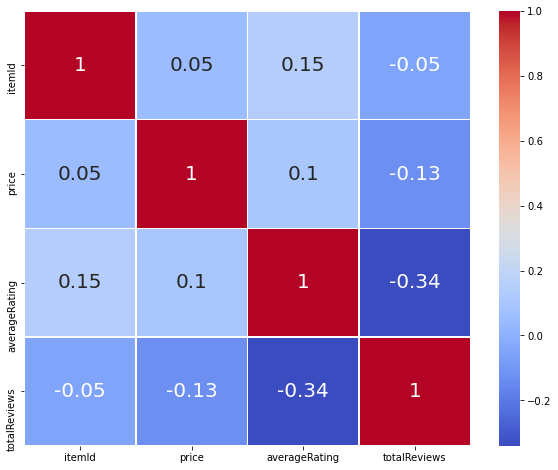

In [1]:
from ipynb.fs.full.Exploratory_Data_Analisis import *

# Data Preprocessing 

## One-Hot Encoder 

In [2]:
df = pd.concat([df, pd.get_dummies(df['category'], prefix = 'cut')], axis = 1)
df.drop(columns = 'category', inplace = True, axis = 1)

In [3]:
df.head()

,price,totalReviews,averageRating,cut_beli-harddisk-eksternal,cut_beli-laptop,cut_beli-smart-tv,cut_jual-flash-drives,cut_shop-televisi-digital
0,2499000,8,4,1,0,0,0,0
1,3788000,3,3,1,0,0,0,0
2,3850000,2,3,1,0,0,0,0
3,1275000,11,3,1,0,0,0,0
4,3984100,1,5,1,0,0,0,0


## Split dataset 

In [4]:
X = df.drop(['averageRating'], axis = 1)
y = df['averageRating']

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 250)

In [6]:
print(f'Total of Dataset : {len(X)}')
print(f'Total of Train Dataset : {len(X_train)}')
print(f'Total of Test Dataset : {len(X_test)}')

Total of Dataset : 7796
Total of Train Dataset : 7016
Total of Test Dataset : 780


## Normalization 

In [7]:
from sklearn.preprocessing import StandardScaler

In [8]:
numerical_kolom = ['price','totalReviews']

scaler = StandardScaler()
scaler.fit(X_train[numerical_kolom])
X_train[numerical_kolom] = scaler.transform(X_train.loc[:, numerical_kolom])
X_train.head()

,price,totalReviews,cut_beli-harddisk-eksternal,cut_beli-laptop,cut_beli-smart-tv,cut_jual-flash-drives,cut_shop-televisi-digital
5738,0.014957,0.187858,0,0,1,0,0
3418,0.068477,0.764541,1,0,0,0,0
10242,0.766056,-0.388825,0,0,0,0,1
9840,0.641496,-0.100484,0,0,0,0,1
135,-0.842434,-0.100484,1,0,0,0,0


In [9]:
X_test[numerical_kolom] = scaler.transform(X_test.loc[:, numerical_kolom])
X_test.head()

,price,totalReviews,cut_beli-harddisk-eksternal,cut_beli-laptop,cut_beli-smart-tv,cut_jual-flash-drives,cut_shop-televisi-digital
8476,-0.841603,0.187858,0,0,0,1,0
1973,-0.807557,0.764541,1,0,0,0,0
360,0.141593,-0.677167,1,0,0,0,0
3855,-0.562173,0.187858,1,0,0,0,0
5433,-0.024529,2.782931,0,0,1,0,0


# Modeling

## Train 

### Support Vector Regressor (SVR)

In [10]:
from sklearn.svm import SVR

model_svr = SVR(kernel = 'rbf')

In [11]:
model_svr.fit(X_train, y_train)

SVR()

### Boosting Algorithm 

In [12]:
from sklearn.ensemble import AdaBoostRegressor
boosting = AdaBoostRegressor(learning_rate = 0.5, random_state = 100)

In [13]:
boosting.fit(X_train, y_train)

AdaBoostRegressor(learning_rate=0.5, random_state=100)

### Linear Regression 

In [14]:
from sklearn.linear_model import LinearRegression
linear = LinearRegression()

In [15]:
linear.fit(X_train, y_train)

LinearRegression()

## Testing 

In [16]:
y_pred_svr = model_svr.predict(X_test)
y_pred_boosting = boosting.predict(X_test)
y_pred_linear = linear.predict(X_test)

# Evaluasi

In [17]:
from sklearn.metrics import classification_report, mean_squared_error

## Train 

In [18]:
evaluation_svr_train = mean_squared_error(y_pred = model_svr.predict(X_train), y_true = y_train)
evaluation_boost_train = mean_squared_error(y_pred = boosting.predict(X_train), y_true = y_train)
evaluation_linear_train = mean_squared_error(y_pred = linear.predict(X_train), y_true = y_train)

print('Mean Squared Error SVR:',format(evaluation_svr_train.round(2)))
print('Mean Squared Error Boosting:',format(evaluation_boost_train.round(2)))
print('Mean Squared Error Linear:',format(evaluation_linear_train.round(2)))

Mean Squared Error SVR: 0.48
Mean Squared Error Boosting: 0.43
Mean Squared Error Linear: 0.46


## Testing 

In [19]:
evaluation_svr_testing = mean_squared_error(y_pred = y_pred_svr, y_true = y_test)
evaluation_boost_testing = mean_squared_error(y_pred = y_pred_boosting, y_true = y_test)
evaluation_linear_testing = mean_squared_error(y_pred = y_pred_linear, y_true = y_test)

print('Mean Squared Error SVR:',format(evaluation_svr_testing.round(2)))
print('Mean Squared Error Boosting:',format(evaluation_boost_testing.round(2)))
print('Mean Squared Error Linear:',format(evaluation_linear_testing.round(2)))

Mean Squared Error SVR: 0.39
Mean Squared Error Boosting: 0.39
Mean Squared Error Linear: 0.4


## Data Actual 

In [20]:
X_nilai_rill = X_test.iloc[0:5].copy()
y_nilai_rill = y_test.iloc[0:5].copy()

In [21]:
X_nilai_rill

,price,totalReviews,cut_beli-harddisk-eksternal,cut_beli-laptop,cut_beli-smart-tv,cut_jual-flash-drives,cut_shop-televisi-digital
8476,-0.841603,0.187858,0,0,0,1,0
1973,-0.807557,0.764541,1,0,0,0,0
360,0.141593,-0.677167,1,0,0,0,0
3855,-0.562173,0.187858,1,0,0,0,0
5433,-0.024529,2.782931,0,0,1,0,0


In [22]:
y_nilai_rill

8476    4
1973    5
360     5
3855    4
5433    4
Name: averageRating, dtype: int64

In [23]:
prediksi_predict_rill_svr = model_svr.predict(X_nilai_rill)
prediksi_predict_rill_boosting = boosting.predict(X_nilai_rill)
prediksi_predict_rill_linear = linear.predict(X_nilai_rill)

In [24]:
data = y_nilai_rill.values, prediksi_predict_rill_svr, prediksi_predict_rill_boosting, prediksi_predict_rill_linear

df_evaluation = pd.DataFrame(data = data, index=['Nilai Rill', 'SVR', 'Boosting', 'Linear'])

In [25]:
df_evaluations = df_evaluation.T
df_evaluations

,Nilai Rill,SVR,Boosting,Linear
0,4.0,4.303432,3.872449,4.352629
1,5.0,3.913296,4.097528,4.245346
2,5.0,4.899930,4.665452,4.621308
3,4.0,4.336413,4.245389,4.390146
4,4.0,3.881615,4.097528,3.801673


In [26]:
df_mse = pd.DataFrame(data = [
                             ['SVR',evaluation_svr_train.round(2), evaluation_svr_testing.round(2)],
                             ['Boosting',evaluation_boost_train.round(2), evaluation_boost_testing.round(2)],
                             ['Linear',evaluation_linear_train.round(2), evaluation_linear_testing.round(2)]
                             ],
                     columns = ['Model','Train', 'Testing'])

df_mse

,Model,Train,Testing
0,SVR,0.48,0.39
1,Boosting,0.43,0.39
2,Linear,0.46,0.40
